In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv("/Users/Alex/Downloads/Pre-procesado.csv")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Label'], axis=1),
    df['Label'],
    test_size=0.3,
    random_state=0)

In [26]:
rf1 = RandomForestClassifier(n_estimators = 100)
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
print(rf1.feature_importances_) #buscar feature_importance en selectfromModel

[0.15397834 0.10195231 0.08108328 0.03305961 0.02096503 0.01882676
 0.00845155 0.0454041  0.02930005 0.02956818 0.04506657 0.04791988
 0.01695816 0.05729269 0.02513227 0.02452204 0.02813686 0.02692001
 0.02392528 0.03884475 0.02422645 0.0269187  0.00479345 0.016082
 0.01964384 0.01559202 0.00612241 0.00609203 0.00583467 0.01738673]


In [28]:
l = []
for feature in zip(rf1.feature_importances_,X_train.columns):
    l.append(feature)
    print(feature)

(0.15397833595874688, 'DER_mass_MMC')
(0.10195230968248856, 'DER_mass_transverse_met_lep')
(0.08108327689864221, 'DER_mass_vis')
(0.03305960621264352, 'DER_pt_h')
(0.020965025299087295, 'DER_deltaeta_jet_jet')
(0.018826759695456583, 'DER_mass_jet_jet')
(0.008451546118176811, 'DER_prodeta_jet_jet')
(0.045404099262983603, 'DER_deltar_tau_lep')
(0.02930005380080491, 'DER_pt_tot')
(0.029568179277958084, 'DER_sum_pt')
(0.045066569115604686, 'DER_pt_ratio_lep_tau')
(0.04791988175208589, 'DER_met_phi_centrality')
(0.016958163654488975, 'DER_lep_eta_centrality')
(0.057292693961376484, 'PRI_tau_pt')
(0.025132272098367135, 'PRI_tau_eta')
(0.02452203773489151, 'PRI_tau_phi')
(0.02813685644673639, 'PRI_lep_pt')
(0.026920013307944884, 'PRI_lep_eta')
(0.02392527560099679, 'PRI_lep_phi')
(0.03884474572425642, 'PRI_met')
(0.02422644929621441, 'PRI_met_phi')
(0.026918699727293563, 'PRI_met_sumet')
(0.0047934477621531454, 'PRI_jet_num')
(0.016082004214581433, 'PRI_jet_leading_pt')
(0.019643837228747355,

In [29]:
l.sort(reverse=True)

In [30]:
l

[(0.15397833595874688, 'DER_mass_MMC'),
 (0.10195230968248856, 'DER_mass_transverse_met_lep'),
 (0.08108327689864221, 'DER_mass_vis'),
 (0.057292693961376484, 'PRI_tau_pt'),
 (0.04791988175208589, 'DER_met_phi_centrality'),
 (0.045404099262983603, 'DER_deltar_tau_lep'),
 (0.045066569115604686, 'DER_pt_ratio_lep_tau'),
 (0.03884474572425642, 'PRI_met'),
 (0.03305960621264352, 'DER_pt_h'),
 (0.029568179277958084, 'DER_sum_pt'),
 (0.02930005380080491, 'DER_pt_tot'),
 (0.02813685644673639, 'PRI_lep_pt'),
 (0.026920013307944884, 'PRI_lep_eta'),
 (0.026918699727293563, 'PRI_met_sumet'),
 (0.025132272098367135, 'PRI_tau_eta'),
 (0.02452203773489151, 'PRI_tau_phi'),
 (0.02422644929621441, 'PRI_met_phi'),
 (0.02392527560099679, 'PRI_lep_phi'),
 (0.020965025299087295, 'DER_deltaeta_jet_jet'),
 (0.019643837228747355, 'PRI_jet_leading_eta'),
 (0.018826759695456583, 'DER_mass_jet_jet'),
 (0.017386729993257237, 'PRI_jet_all_pt'),
 (0.016958163654488975, 'DER_lep_eta_centrality'),
 (0.016082004214581

In [31]:
l_i = []
l_v = []
for importance in range(len(l)):
    for var in range(len(l[importance])):
        if(var == 0):
            l_i.append(l[importance][var])
        else:
            l_v.append(l[importance][var])

In [32]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array(l_i[0:10])
x = np.array(l_v[0:10])


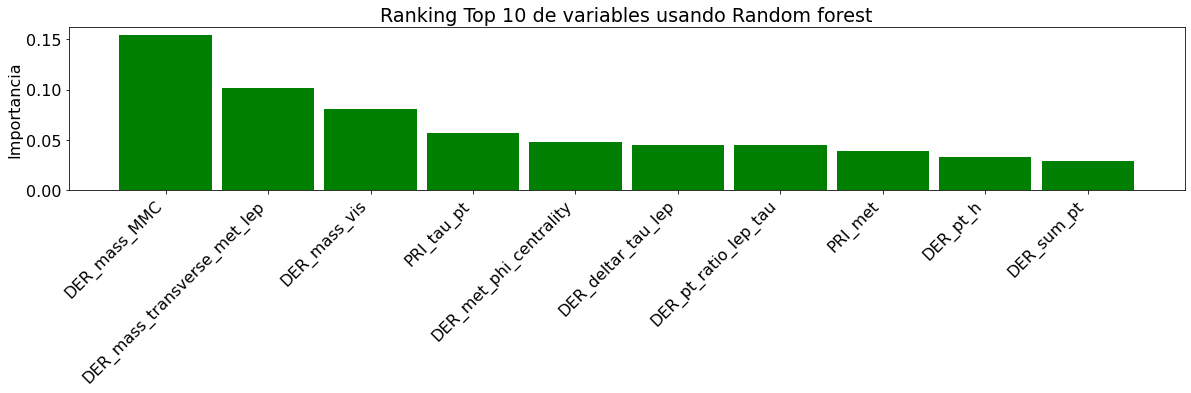

In [33]:
import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize = (20, 3))


# creating the bar plot
plt.ylabel("Importancia")
plt.bar(x, y, color ='green',
        width = 0.9)
plt.xticks(rotation=45, ha='right')
plt.title("Ranking Top 10 de variables usando Random forest")
plt.show()